<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/mlp(109_10_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片，訓練答案), (測試圖片，測試答案))
((x_train, y_train), (x_test, y_test)) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,38,106,0,0,0,0,0,0,15,234,127,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,168,202,0,0,0,0,0,0,133,254,155,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,39,245,202,0,0,0,0,0,51,253,249,52,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,137,254,97,0,0,0,0,19,229,254,184,0,0,0,0,0,0


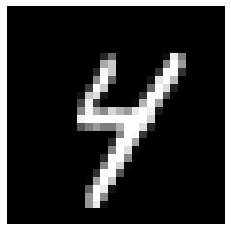

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.axis("off")
plt.imshow(x_train[idx], cmap = "gray")
pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = (
          # 784 * 128 + 128 = 100480 parameters
          Dense(256, activation = "relu", input_dim = 784),
          # 128 * 10 + 10(bias) = 1290 parameters
          Dense(10, activation = "softmax")
)
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 打-1可以讓電腦自己算
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 一個神經元: binary ceossentropy p*log 1/q + (1-p)*log 1/(1-q)
# 多個神經元: categorical crossentropy p1*log 1/q1 + ......
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = CategoricalCrossentropy(),
              optimizer = Adam(),
              metrics = ["accuracy"])

In [ ]:
# batch: 100~200(小圖片) 10~20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆，2epoch，200batch -> 60000 * 2 /200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             ModelCheckpoint("model.h5", save_best_only = True),
             EarlyStopping(patience = 5, restore_best_weights = True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size = 100,
          epochs = 50,
          callbacks = callbacks,
          verbose = 2,
          validation_split = 0.1)
# loss & accuracy 較沒參考價值
# val_loss & val_accuracy 資訊較重要(經過驗證後的資訊)

Epoch 1/50
540/540 - 2s - loss: 0.3029 - accuracy: 0.9159 - val_loss: 0.1463 - val_accuracy: 0.9590
Epoch 2/50
540/540 - 2s - loss: 0.1315 - accuracy: 0.9620 - val_loss: 0.0962 - val_accuracy: 0.9742
Epoch 3/50
540/540 - 2s - loss: 0.0878 - accuracy: 0.9744 - val_loss: 0.0784 - val_accuracy: 0.9788
Epoch 4/50
540/540 - 2s - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.0790 - val_accuracy: 0.9778
Epoch 5/50
540/540 - 2s - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.0744 - val_accuracy: 0.9783
Epoch 6/50
540/540 - 2s - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0770 - val_accuracy: 0.9763
Epoch 7/50
540/540 - 2s - loss: 0.0298 - accuracy: 0.9920 - val_loss: 0.0746 - val_accuracy: 0.9802
Epoch 8/50
540/540 - 2s - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0709 - val_accuracy: 0.9803
Epoch 9/50
540/540 - 2s - loss: 0.0182 - accuracy: 0.9953 - val_loss: 0.0654 - val_accuracy: 0.9827
Epoch 10/50
540/540 - 2s - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0712 - val_accuracy: 0.9802

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9804


[0.06336235255002975, 0.980400025844574]

In [ ]:
# 手動儲存: model.save("model.h5")
# if not os.path.exists("model.h5"):
#    newmodel & compile
# else:
#    load_model
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# 不用再compile，可以直接繼續fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9804


[0.06336235255002975, 0.980400025844574]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             index = ["{}(原本)".format(n) for n in range(10)],
             columns = ["{}(預測)".format(n) for n in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),970,0,1,1,1,2,3,1,1,0
1(原本),0,1124,3,1,0,1,2,1,3,0
2(原本),4,2,1007,2,2,0,2,5,8,0
3(原本),1,0,1,997,0,3,0,2,4,2
4(原本),1,0,0,1,962,0,3,2,2,11
5(原本),2,0,0,9,1,872,1,2,4,1
6(原本),5,2,2,1,7,4,936,0,1,0
7(原本),1,1,7,2,1,0,0,1009,2,5
8(原本),1,0,2,5,1,2,1,2,958,2
9(原本),3,3,0,13,7,2,0,5,7,969


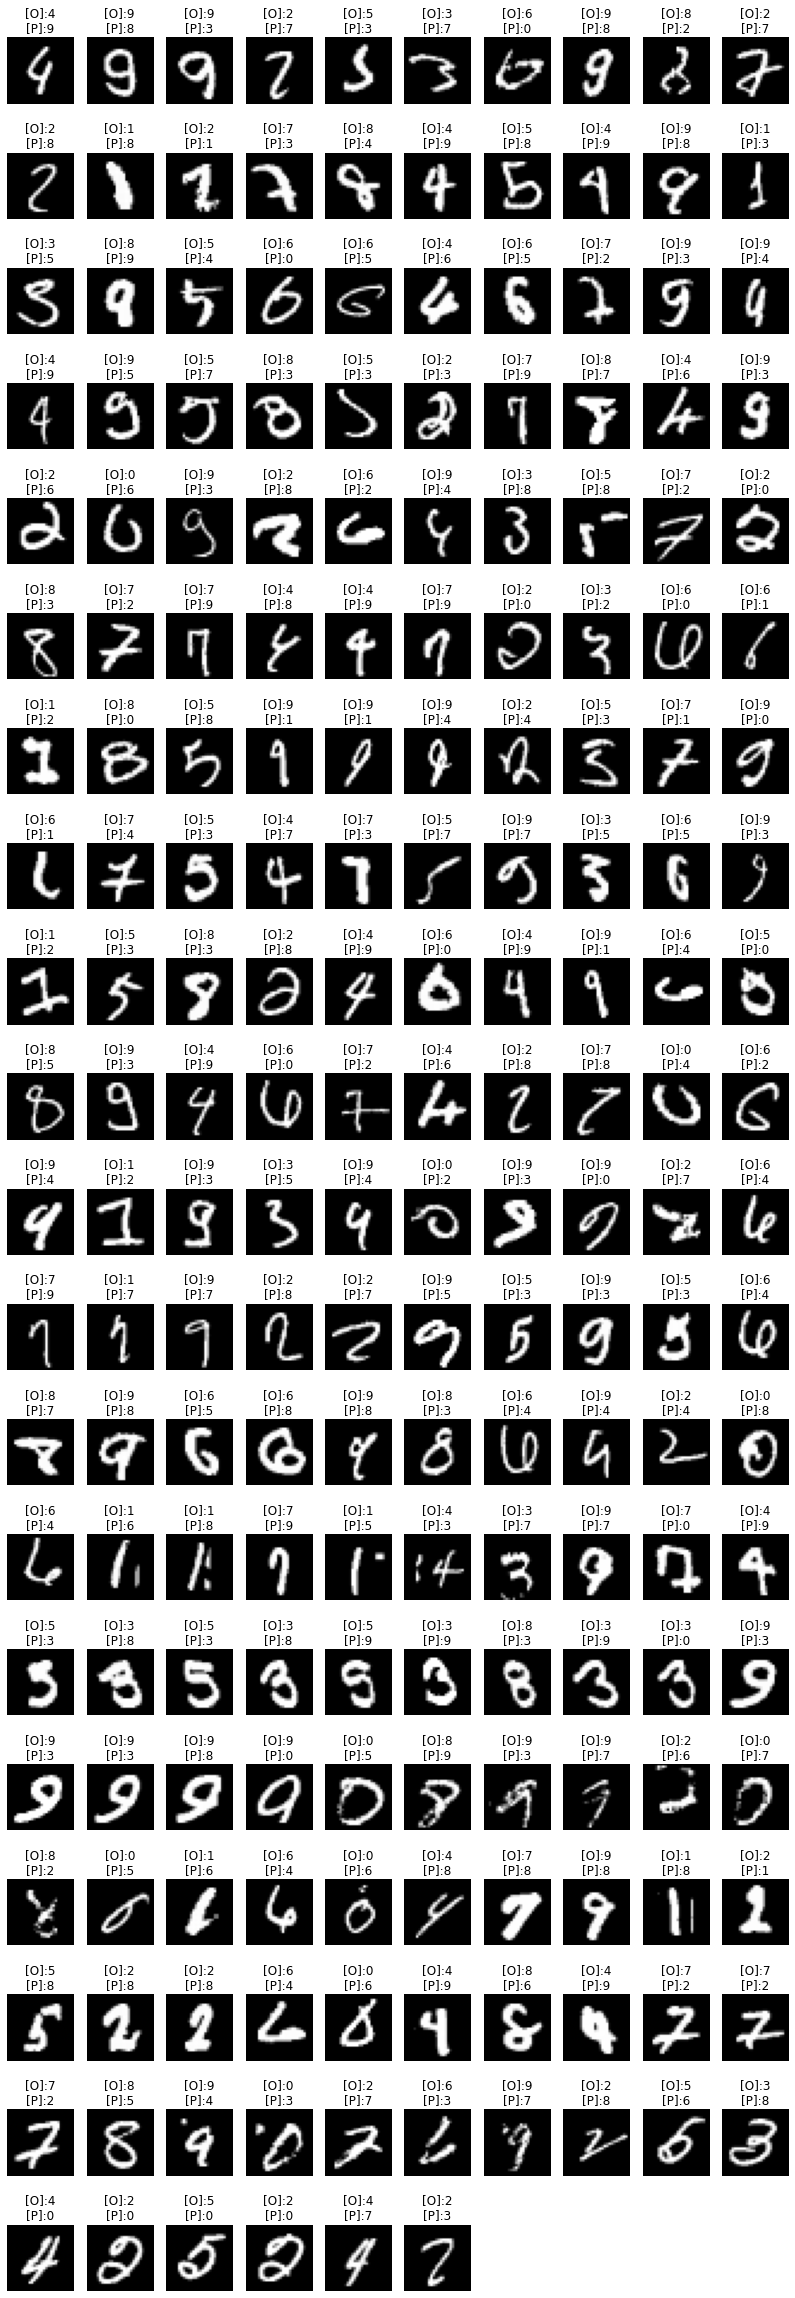

In [ ]:
# subplot(總高度，總寬度，ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize = (14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i + 1)
    title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i], cmap = "gray")

檔名test2.png
0 的機率是: 0.0
1 的機率是: 0.0
2 的機率是: 0.0
3 的機率是: 1.0
4 的機率是: 0.0
5 的機率是: 0.0
6 的機率是: 0.0
7 的機率是: 0.0
8 的機率是: 0.0
9 的機率是: 0.0


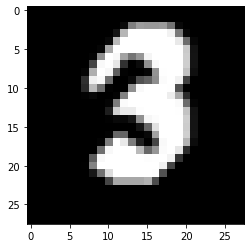

In [ ]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(i, "的機率是:", round(p, 3))
plt.imshow(img_np, cmap = "gray")